In [1]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72
import numpy as np

# Import datasets, classifiers and performance metrics
from sklearn import datasets

In [2]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))
print(f"shape:{digits.images.shape}")

shape:(1797, 8, 8)


In [3]:
print(f'Number of images in the training set, N= {len(images_and_labels)}')

Number of images in the training set, N= 1797


type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <class 'numpy.float64'>
type: <cla

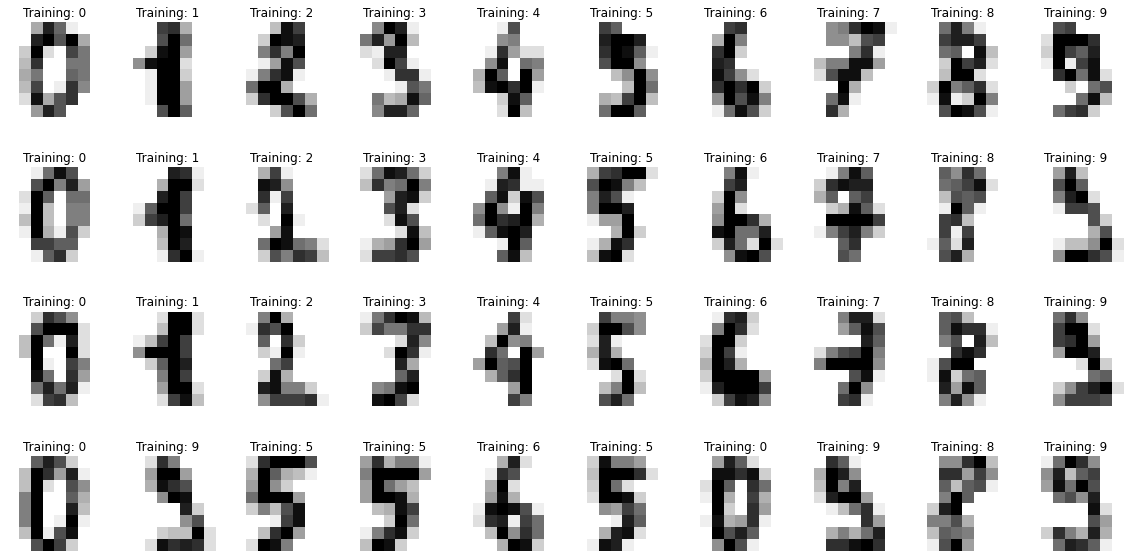

In [4]:
# Draw the first 40 data points - in this case a single data point is an image
plt.figure(1, figsize=(20, 10), dpi=72)
for index, (image, label) in enumerate(images_and_labels[:40]):
    print(f"type: {type(image[0][0])}")
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [5]:
# Check how the data looks like, examine the label as the last element, 1st data point, 2nd data point
print(images_and_labels[0])
print(images_and_labels[1])

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)
(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1)


In [6]:
# Check the size of the data structures, data vectors, examine the indices
print(len(images_and_labels))
print(len(images_and_labels[0]))
print(len(images_and_labels[0][0]))
print(len(images_and_labels[0][0][0]))

1797
2
8
8


In [7]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
print(X)
print(f'N={len(X)}, M={len(X[0])}, type={type(X)}, shape={X.shape}')

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
N=1797, M=64, type=<class 'numpy.ndarray'>, shape=(1797, 64)


In [8]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(X[:n_samples//2], digits.target[:n_samples//2])

# Predict the value of the digit on the second half
expected = digits.target[n_samples//2:]
predicted = classifier.predict(X[n_samples//2:])


In [9]:
%%time

acc = metrics.accuracy_score(expected, predicted)

print(f'Classification report for classifier {classifier}:\nAccuracy={acc:.3f}\n')

Classification report for classifier SVC(gamma=0.001):
Accuracy=0.969

CPU times: user 1.06 ms, sys: 792 µs, total: 1.85 ms
Wall time: 1.34 ms


In [10]:
print(f'Confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}')

Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


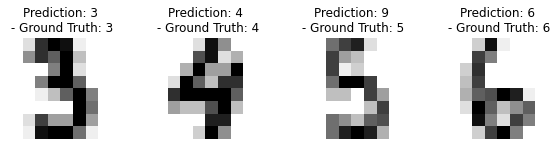

In [11]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))

plt.figure(1, figsize=(10, 4), dpi=72)
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')

plt.show()

In [12]:
# Hyperparameter search
gamma_param = [1e-1, 1e-2, 1e-4, 1e-5]

Classifiers = [svm.SVC(gamma=param) for param in gamma_param]

training, training_labels = X[:n_samples//2], digits.target[:n_samples//2]
testing, testing_labels = X[n_samples//2:], digits.target[n_samples//2:]

for clf in Classifiers:
    clf.fit(training, training_labels)

predicteds = [clf.predict(testing) for clf in Classifiers]

for i, clf in enumerate(Classifiers):
    acc = metrics.accuracy_score(expected, predicteds[i])
    print(f'Model-{i} (g={gamma_param[i]:.0e}) Accuracy={acc:.3f}')

Model-0 (g=1e-01) Accuracy=0.101
Model-1 (g=1e-02) Accuracy=0.697
Model-2 (g=1e-04) Accuracy=0.940
Model-3 (g=1e-05) Accuracy=0.798


In [13]:
from sklearn.decomposition import PCA

# Visualize the models above in 2D
Xpca = PCA(n_components=2).fit_transform(X)

# train and test datasets and their labels
Xtr, ytr = Xpca[:Xpca.shape[0]//2], digits.target[:digits.target.shape[0]//2]
Xts, yts = Xpca[Xpca.shape[0]//2:], digits.target[digits.target.shape[0]//2:]

for clf in Classifiers:
    clf.fit(Xtr, ytr)

ypreds = [clf.predict(Xts) for clf in Classifiers]

for i, clf in enumerate(Classifiers):
    acc = metrics.accuracy_score(yts, ypreds[i])
    print(f'M=2 (PCA), Model-{i} (g={gamma_param[i]:.0e}) Acc={acc:.3f}')

h = 0.3  # mesh granularity of the plot

def plot_decisionboundary(_X, _clf, _h, color_db='r'):  # _h = step size in the mesh
    def get_minmax(_X, _m):  # _m = margin for visuals
        return _X[:,0].min()-_m, _X[:,0].max()+_m, _X[:,1].min()-_m, _X[:,1].max()+_m
    x1_min, x1_max, x2_min, x2_max = get_minmax(_X, 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, _h), np.arange(x2_min, x2_max, _h))
    ypred = _clf.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
    plt.contour(xx1, xx2, ypred, colors=color_db, linestyles='dotted')
    
plt.figure(figsize=(18, 4), dpi=300)
for i, clf in enumerate(Classifiers):
    plt.subplot(1, 4, i+1)
    plt.scatter(Xpca[:,0], Xpca[:,1], s=8, c=digits.target.tolist(), alpha=0.5)
    plot_decisionboundary(Xpca, clf, h)
    plt.title(f'Model-{i}')

M=2 (PCA), Model-0 (g=1e-01) Acc=0.598
M=2 (PCA), Model-1 (g=1e-02) Acc=0.626
M=2 (PCA), Model-2 (g=1e-04) Acc=0.587
M=2 (PCA), Model-3 (g=1e-05) Acc=0.349
